In [50]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import mdshare
import pyemma
import argparse
import os
import glob
import deeptime
from deeptime.markov.msm import MaximumLikelihoodMSM

In [29]:
E1 = 4.0
E2 = 4.5

def v(x, y):
    return 3.0*np.e**(-x**2 + -(y-1.0/3)**2) - E1*np.e**(-x**2-(y-5.0/3)**2)\
         - E2*np.e**(-(x-1.0)**2 + -y**2) - E2*np.e**(-(x+1.0)**2 + -y**2)\
         + 2.0/10.0 * (x**4 + (y-1.0/3)**4)         

def f(v):
    x = v[0]
    y = v[1]
    return 3.0*np.e**(-x**2 + -(y-1.0/3)**2) - E1*np.e**(-x**2-(y-5.0/3)**2)\
         - E2*np.e**(-(x-1.0)**2 + -y**2) - E2*np.e**(-(x+1.0)**2 + -y**2)\
         + 2.0/10.0 * (x**4 + (y-1.0/3)**4)    

def F(v):
    x = v[0]
    y = v[1]
    Vx = -3.0*2.0*x * np.e**(-x**2 + -(y-1.0/3)**2) + E1*2.0*x*np.e**(-x**2-(y-5.0/3)**2)\
        + E2 * 2.0 * ((x-1.0)*np.e**(-(x-1.0)**2 + -y**2) + (x+1.0)*np.e**(-(x+1.0)**2 + -y**2))\
        + 8.0/10 * x**3

    Vy = -3.0 * 2.0 * (y-1.0/3)*np.e**(-x**2-(y-1.0/3)**2) + E1 * 2.0 * (y-5.0/3)*np.e**(-x**2-(y-5.0/3)**2)\
        + E2*2.0*y * (np.e**(-(x-1.0)**2 + -y**2) + np.e**(-(x+1.0)**2 + -y**2))\
        + 8.0/10 * (y-1.0/3)**3

    return np.array([Vx, Vy])                   

def euler_propagation(v0, N, dt, beta):
    dim = v0.shape[0]
    sigma  = np.sqrt(2.0*dt/beta)
    dW = np.random.randn(N, dim)
    v = np.zeros((N, dim))
    v[0, :] = v0
    for i in range(N-1):
        v[i+1, :] = v[i, :] + -F(v[i, :])*dt + sigma * dW[i, :]
    return v       
def generate(N,beta,outfile):
    dt = 1e-3
    S0 = np.array([-1.0, 0.0])
    S = euler_propagation(S0, N, dt, beta)
    if os.path.splitext(outfile)[1]=='.npy':
        np.save(outfile, S)

    nx = 100
    lx = -1.8
    Lx = 1.8
    x = np.linspace(lx, Lx, nx)
    ly = -1.2
    Ly = 2.2
    y = np.linspace(ly, Ly, nx)
    X, Y = np.meshgrid(x, y)
    Z = v(X, Y)
    levels = np.array([-3.5, -3.0, -2.5, -2.0, -1.5, -1.0, -0.5, 0.0])
    fig = plt.figure(0)
    ax = fig.add_subplot(111)
    ax.set_xlim(lx, Lx)
    ax.set_ylim(ly, Ly)
    ax.set_xlabel(r"$x$")
    ax.set_ylabel(r"$y$")
    cs = ax.contour(X, Y, Z, levels)
    ax.plot(S[:, 0], S[:, 1], c='k')
    plt.clabel(cs, inline=1, fontsize=10)
    plt.show()
    return S 

    

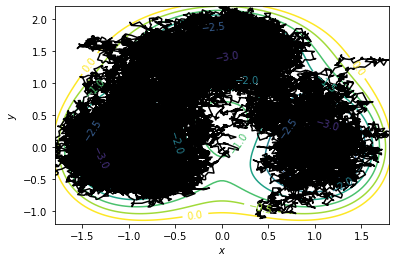

In [39]:
data=generate(100000,1.5,'noidea.npy')


In [32]:
data
len(data)

100000

In [40]:
cluster = deeptime.clustering.BoxDiscretization(dim=2,n_boxes=50, v0=[-1.8,-1.2], v1=[1.8,2.2]).fit_fetch(data)

In [41]:
cluster


BoxDiscretizationModel-2308623765216:cluster_centers=array([[-1.8    , -1.2    ],
       [-1.72653, -1.2    ],
       ...,
       [ 1.72653,  2.2    ],
       [ 1.8    ,  2.2    ]]),
                   n_boxes=[50, 50], v0=[-1.8, -1.2], v1=[1.8, 2.2]]

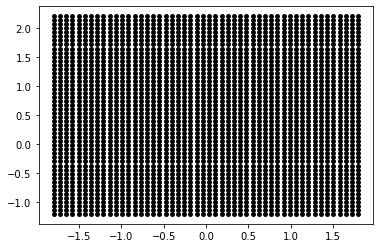

In [42]:
plt.scatter(*cluster.cluster_centers.T, s=15, c='k')

In [43]:
dtraj = cluster.transform(data)

In [49]:
MaximumLikelihoodMSM(lagtime=1).fit_fetch(dtraj)

Skipping state set [0] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [3] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [4] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [5] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [6] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [7] due to error in estimation: Some row and corresponding column of the count matrix C have zero c

Skipping state set [65] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [66] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [67] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [68] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [69] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [70] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [71] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [72] due to error in estimation: Some row and corresponding column of the count matrix C hav

Skipping state set [139] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [140] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [141] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [142] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [143] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [144] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [145] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [146] due to error in estimation: Some row and corresponding column of the count matr

Skipping state set [210] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [212] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [213] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [217] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [218] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [219] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [220] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [221] due to error in estimation: Some row and corresponding column of the count matr

Skipping state set [321] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [322] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [323] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [324] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [325] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [326] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [327] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [328] due to error in estimation: Some row and corresponding column of the count matr

Skipping state set [496] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [497] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [498] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [499] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [501] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [523] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [524] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [525] due to error in estimation: Some row and corresponding column of the count matr

Skipping state set [829] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [830] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [849] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [876] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [878] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [879] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [899] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [927] due to error in estimation: Some row and corresponding column of the count matr

Skipping state set [1496] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1497] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1498] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1499] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1500] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1501] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1502] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1503] due to error in estimation: Some row and corresponding column of the co

Skipping state set [1799] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1800] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1801] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1802] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1803] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1804] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1805] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [1806] due to error in estimation: Some row and corresponding column of the co

Skipping state set [2046] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2047] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2048] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2049] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2050] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2051] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2052] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2053] due to error in estimation: Some row and corresponding column of the co

Skipping state set [2203] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2204] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2205] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2206] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2207] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2208] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2209] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2210] due to error in estimation: Some row and corresponding column of the co

Skipping state set [2335] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2336] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2337] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2338] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2339] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2340] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2341] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2342] due to error in estimation: Some row and corresponding column of the co

Skipping state set [2414] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2415] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2416] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2417] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2418] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2419] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2421] due to error in estimation: Some row and corresponding column of the count matrix C have zero counts..
Skipping state set [2430] due to error in estimation: Some row and corresponding column of the co

MarkovStateModelCollection-2308624392640:count_models=None, reversible=True,
                     stationary_distributions=None,
                     transition_matrices=None,
                     transition_matrix_tolerance=1e-06]